In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("sentiment_labeled_dataset.csv")
df.head()

,title,text,label,sad,joy,love,anger,fear,surprise
0,Stocks making the biggest moves midday: Palo A...,A view of the exterior of the new Dutch head o...,-2,0.359188,0.071665,0.004267,0.082822,0.472865,0.009193
1,3M will spin off its health-care business into...,3M announced Tuesday it will spin off its heal...,-2,0.015277,0.883310,0.003745,0.073863,0.021894,0.001911
2,"Stocks making the biggest moves midday: 3M, Pa...",A woman walks near a Bed Bath & Beyond branch ...,0,0.943221,0.030316,0.001350,0.015318,0.008357,0.001438
3,"3M to cut 2,500 jobs as demand weakens, profit...",An employee unboxes N95 masks as part of a gov...,0,0.527648,0.099365,0.004145,0.267745,0.097570,0.003527
4,"3M combat earplug lawsuits to proceed, judge r...","3M must face more than 230,000 lawsuits accusi...",-2,0.458573,0.118592,0.003953,0.347082,0.067371,0.004430


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     4516 non-null   object 
 1   text      4516 non-null   object 
 2   label     4516 non-null   int64  
 3   sad       4516 non-null   float64
 4   joy       4516 non-null   float64
 5   love      4516 non-null   float64
 6   anger     4516 non-null   float64
 7   fear      4516 non-null   float64
 8   surprise  4516 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 317.7+ KB


In [4]:
exm_title = df['title'][500]
print(exm_title)

Bed Bath & Beyond appoints interim CEO Sue Gove to the position permanently


In [5]:
exm_txt = df['text'][500]
print(exm_txt)

Bed Bath & Beyond said Wednesday it has appointed interim CEO Sue Gove to the position permanently.

The company's shares closed down over 5% Wednesday. The stock has declined about 65% so far this year. The company's market cap stands at about $401 million.

Gove, a company board member and longtime retail consultant, is stepping into the role at a pivotal time for the home goods retailer. Bed Bath is trying to reverse declining sales, win back customers and strengthen relationships with suppliers. It is also gearing up for the holiday season, a key quarter that could determine whether it can stabilize its finances.

Gove was named interim CEO in June after the company's board pushed out former Chief Executive Mark Tritton. She is the founder of a retail consulting and advisory firm, Excelsior Advisors. Before she became a consultant, she had several financial and strategic roles, including president and chief executive officer of Golfsmith International Holdings and chief operating o

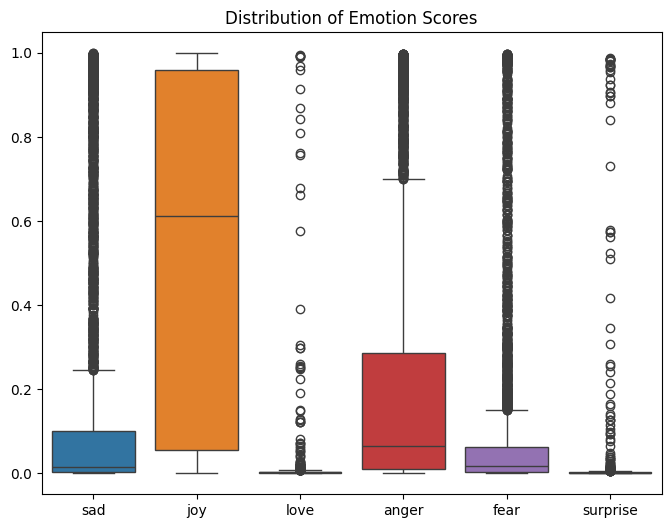

In [6]:
#Emotion Score Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['sad', 'joy', 'love', 'anger', 'fear', 'surprise']])
plt.title("Distribution of Emotion Scores")
plt.show()

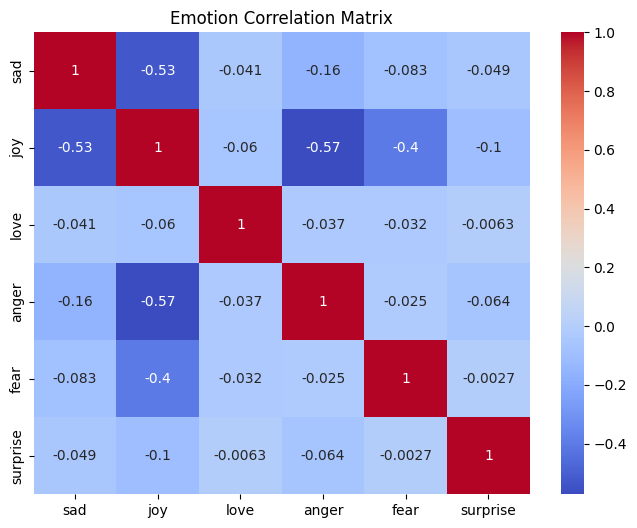

In [8]:
#Correlation between Emotions
plt.figure(figsize=(8, 6))
sns.heatmap(df[['sad', 'joy', 'love', 'anger', 'fear', 'surprise']].corr(), annot=True, cmap="coolwarm")
plt.title("Emotion Correlation Matrix")
plt.show()

In [4]:
#Most Frequent Words in Titles
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /teamspace/studios/this_studio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
# Initialize stopwords and lemmatizer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = word_tokenize(text)  # Tokenization
    text = [word for word in text if word not in stop_words]  # Remove stopwords
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatization
    return " ".join(text)

df["clean_text"] = df["text"].apply(clean_text)
df["clean_title"] = df["title"].apply(clean_text)

# Verify cleaned text
print(df[["clean_title", "clean_text"]].head())


                                         clean_title  \
0  stock making biggest move midday palo alto net...   
1        spin healthcare business new public company   
2  stock making biggest move midday paccar bed ba...   
3                 cut job demand weakens profit drop   
4  combat earplug lawsuit proceed judge rule desp...   

                                          clean_text  
0  view exterior new dutch head office internatio...  
1  announced tuesday spin healthcare business sep...  
2  woman walk near bed bath beyond branch january...  
3  employee unboxes n mask part government strate...  
4  must face lawsuit accusing selling defective e...  


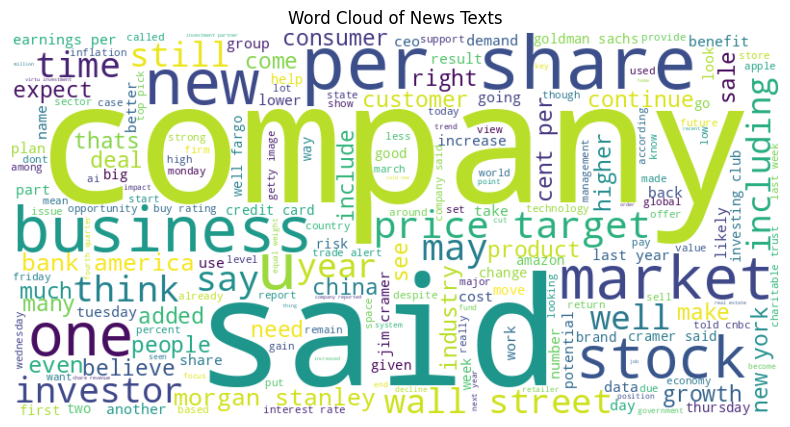

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df["clean_text"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Texts")
plt.show()

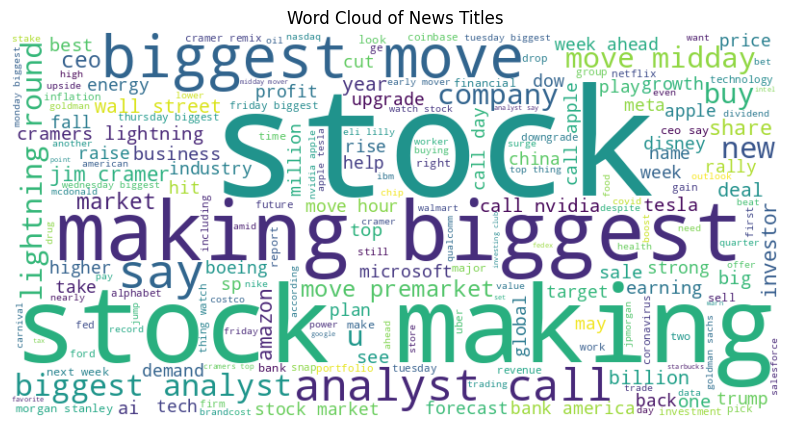

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df["clean_title"]))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of News Titles")
plt.show()

In [6]:
# Calculate the number of words for title and text
df['Num_words_title'] = df['clean_title'].apply(lambda x: len(str(x).split()))
df['Num_words_text'] = df['clean_text'].apply(lambda x: len(str(x).split()))

/tmp/ipykernel_2951/386047309.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


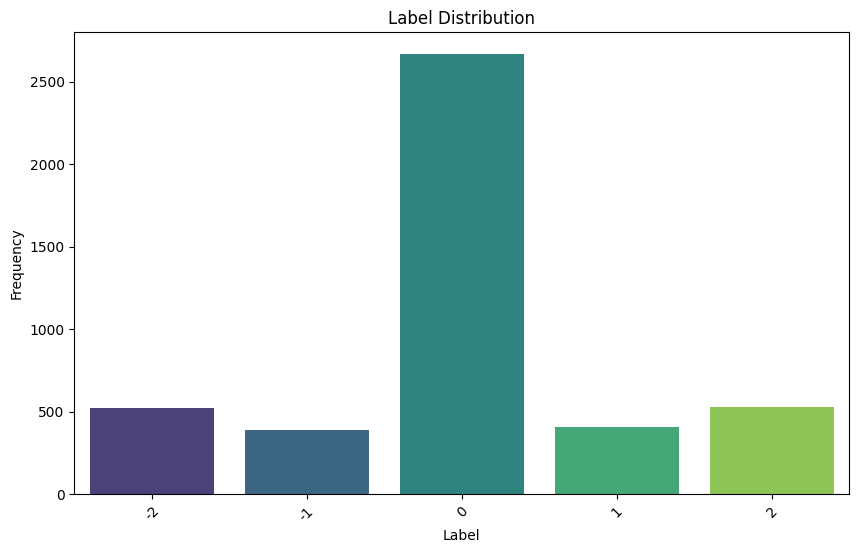

In [7]:
# Count the distribution of labels
label_counts = df['label'].value_counts()

# Plot the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Print the counts of each class
print("Class distribution:\n", label_counts)

# Calculate the percentage of each class
class_percentage = label_counts / len(df) * 100
print("\nClass percentage:\n", class_percentage)

Class distribution:
 label
 0    2667
 2     530
-2     523
 1     406
-1     390
Name: count, dtype: int64

Class percentage:
 label
 0    59.056687
 2    11.736050
-2    11.581045
 1     8.990257
-1     8.635961
Name: count, dtype: float64


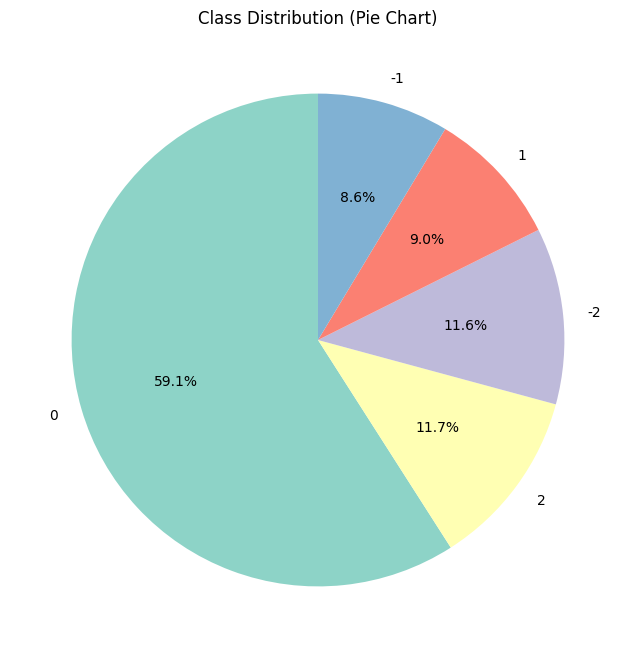

In [12]:
# Plot the class distribution as a pie chart
plt.figure(figsize=(8, 8))
label_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', n_colors=len(label_counts)), startangle=90)
plt.title('Class Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

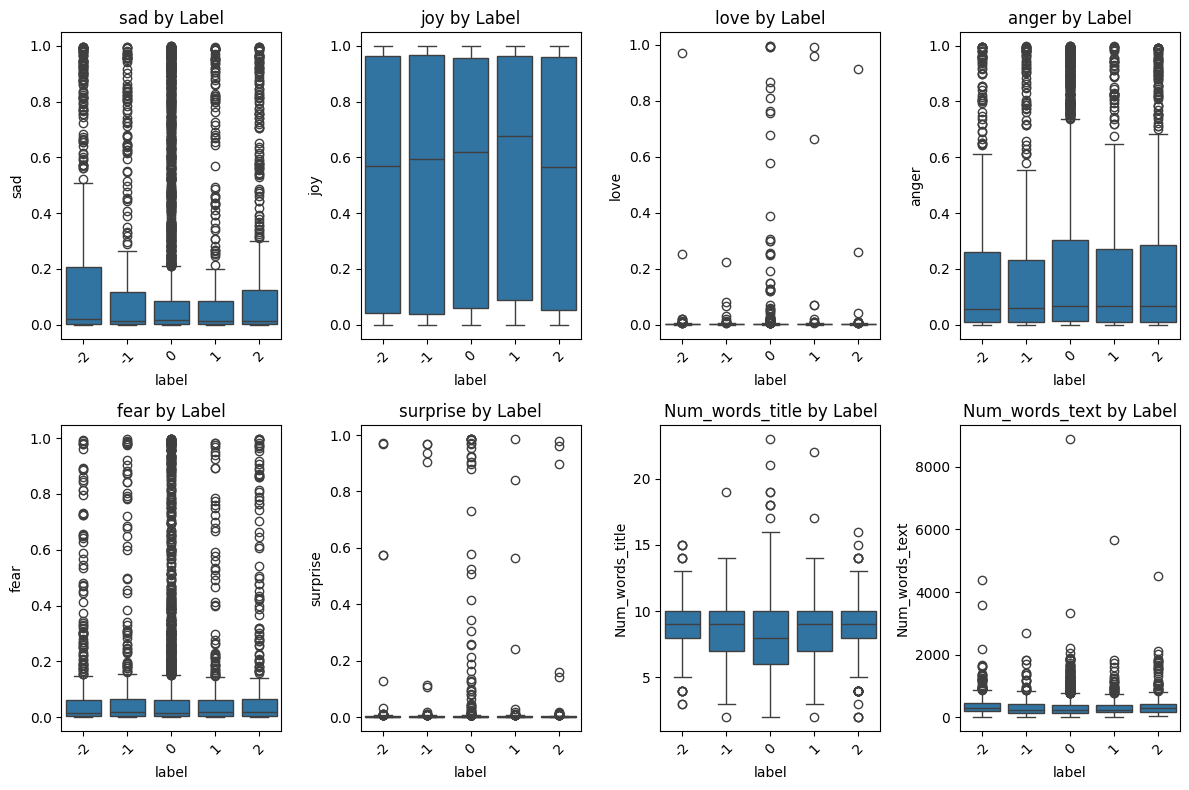

In [13]:
numerical_features = ['sad', 'joy', 'love', 'anger', 'fear', 'surprise', 'Num_words_title', 'Num_words_text']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f'{feature} by Label')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

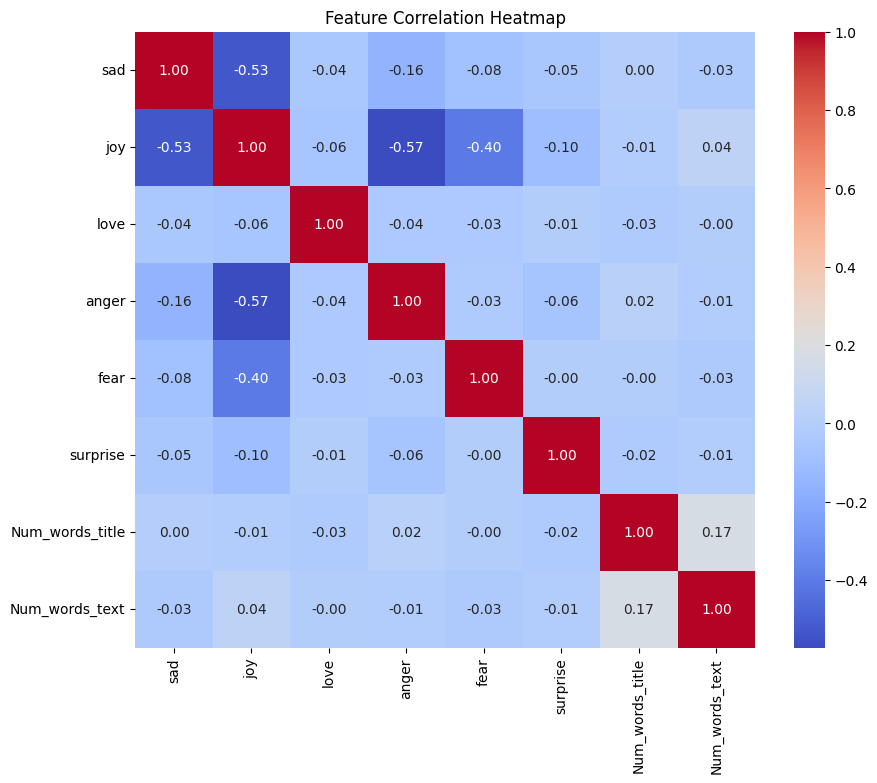

In [14]:
corr = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [6]:
df['title'][1895]

'Stocks making the biggest moves premarket: PepsiCo, Generac, Tempur Sealy, others'

In [7]:
df['clean_text'][1895]

'check company making headline bell pepsico pep beverage snack giant beat estimate penny adjusted quarterly earnings per share revenue estimate well company said expects see organic revenue adjusted profit growth year also announced dividend increase generac gnrc generac share rose premarket trading maker backup generator beat estimate top bottom line latest quarter said expected net sale growth percent year restaurant brand qsr parent popeyes burger king tim hortons missed estimate cent adjusted quarterly earnings cent per share revenue slightly forecast share fell premarket comparable restaurant sale fell expected tempur sealy tpx share mattress maker surged premarket beat forecast cent adjusted quarterly earnings cent per share revenue beat estimate well tempur sealy said expected sale growth labcorp lh medicallaboratory operator reported adjusted quarterly earnings per share well consensus estimate revenue forecast well result boosted covid testing share premarket molson coors tap 

In [8]:
# Tokenize the clean_title and clean_text columns
df["tokenized_title"] = df["clean_title"].apply(word_tokenize)
df["tokenized_text"] = df["clean_text"].apply(word_tokenize)

In [ ]:
import gensim
from gensim.models import KeyedVectors

# Load GloVe vectors from a file
glove_path = "glove.6B.50d.txt"

# Load GloVe format into a dictionary
glove_model = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # First value is the word
        vector = np.array(values[1:], dtype=np.float32)  # Remaining values are the vector
        glove_model[word] = vector

# Example usage
word = "finance"
if word in glove_model:
    print(f"Vector for {word}:", glove_model[word])
else:
    print(f"{word} not found in GloVe model")


Vector for finance: [ 0.26065  -0.2486    0.33918   0.17447   0.16059  -0.17241  -0.49592
 -1.1057   -1.1515   -0.67266  -0.52137   0.98864  -0.39519   0.38565
  0.46111   0.17909   0.53703  -0.071299  1.0576    0.32059   1.5695
 -0.58055  -0.54938  -0.69697  -0.4368   -1.3162    0.73868  -0.56189
 -1.5138    0.9422    2.8278    0.18323  -0.023847  0.12808  -0.23547
  0.20016  -0.6252    0.67822   1.1125   -0.16363  -0.66115   0.64392
  0.31846  -0.40373   0.19716   0.045172 -0.92688   1.5485    1.5444
  0.51316 ]


In [10]:
def get_article_matrix(article, glove_model, max_words=50, vector_size=50):
    vectors = [glove_model[word] for word in article if word in glove_model]
    if len(vectors) < max_words:
        # Pad with zeros if fewer than max_words
        vectors.extend([np.zeros(vector_size)] * (max_words - len(vectors)))
    else:
        # Truncate if more than max_words
        vectors = vectors[:max_words]
    return np.array(vectors)  # Shape: (max_words, vector_size)

# Apply the function to DataFrame columns
df["title_matrix"] = df["tokenized_title"].apply(lambda x: get_article_matrix(x, glove_model))
df["text_matrix"] = df["tokenized_text"].apply(lambda x: get_article_matrix(x, glove_model))


In [11]:
df['text_matrix'][50].shape

(50, 50)

In [12]:
df = df.drop(columns=['title','text','clean_title','clean_text','tokenized_title','tokenized_text'])
df

,label,sad,joy,love,anger,fear,surprise,Num_words_title,Num_words_text,title_matrix,text_matrix
0,-2,0.359188,0.071665,0.004267,0.082822,0.472865,0.009193,10,375,"[[-0.07429999858140945, -0.778410017490387, 0....","[[0.56616, 0.67167, -0.19278, -0.37824, 0.6459..."
1,-2,0.015277,0.883310,0.003745,0.073863,0.021894,0.001911,6,162,"[[0.16434000432491302, -0.853190004825592, -0....","[[0.50892, -0.11413, 0.33814, 0.82997, -0.3639..."
2,0,0.943221,0.030316,0.001350,0.015318,0.008357,0.001438,10,331,"[[-0.07429999858140945, -0.778410017490387, 0....","[[-0.18153, 0.64827, -0.5821, -0.49451, 1.5415..."
3,0,0.527648,0.099365,0.004145,0.267745,0.097570,0.003527,6,161,"[[0.25321999192237854, -0.3435499966144562, 0....","[[0.23666, 0.18914, 0.4051, 0.084121, 0.79485,..."
4,-2,0.458573,0.118592,0.003953,0.347082,0.067371,0.004430,9,209,"[[0.6903899908065796, -0.7246900200843811, 0.1...","[[0.47769, -0.12242, 0.29476, -0.52751, 0.6915..."
...,...,...,...,...,...,...,...,...,...,...,...
4511,0,0.034076,0.880756,0.006172,0.058919,0.016294,0.003782,8,291,"[[0.8733100295066833, -0.12310999631881714, 0....","[[0.9861, 0.0081402, 0.1231, 0.63133, 0.15519,..."
4512,0,0.002336,0.991850,0.000720,0.003608,0.000791,0.000696,8,335,"[[-0.23543000221252441, -0.16904999315738678, ...","[[0.24554, -0.44182, 0.62223, -0.90404, -0.527..."
4513,1,0.453162,0.387901,0.004401,0.108929,0.043114,0.002494,11,329,"[[0.4965200126171112, -0.6514300107955933, -1....","[[0.39412, 0.23183, 0.68751, 0.60652, 1.3761, ..."
4514,0,0.001332,0.992659,0.001126,0.003008,0.001226,0.000649,11,274,"[[0.3315800130367279, 0.23894000053405762, 0.6...","[[0.33028, 0.0068584, 0.071624, 0.74701, 0.204..."


In [ ]:
# vectors are stored as NumPy arrays
df["title_matrix"] = df["title_matrix"].apply(lambda x: np.array(x) if isinstance(x, list) else x)
df["text_matrix"] = df["text_matrix"].apply(lambda x: np.array(x) if isinstance(x, list) else x)

# Stack title_matrix and text_matrix properly for model training
title_matrix = np.stack(df["title_matrix"].values)  # Shape: (N, 300, 300)
text_matrix = np.stack(df["text_matrix"].values)    # Shape: (N, 300, 300)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   label            4516 non-null   int64  
 1   sad              4516 non-null   float64
 2   joy              4516 non-null   float64
 3   love             4516 non-null   float64
 4   anger            4516 non-null   float64
 5   fear             4516 non-null   float64
 6   surprise         4516 non-null   float64
 7   Num_words_title  4516 non-null   int64  
 8   Num_words_text   4516 non-null   int64  
 9   title_matrix     4516 non-null   object 
 10  text_matrix      4516 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 388.2+ KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform

# Extract numerical features
X_numerical = df[['sad', 'joy', 'love', 'anger', 'fear', 'surprise', 
                  'Num_words_title', 'Num_words_text']].values  # Shape: (N, 8)

# Ensure matrices are NumPy arrays
df["title_matrix"] = df["title_matrix"].apply(lambda x: np.array(x) if isinstance(x, list) else x)
df["text_matrix"] = df["text_matrix"].apply(lambda x: np.array(x) if isinstance(x, list) else x)

# Convert 3D title_matrix and text_matrix into 2D by flattening
title_matrix_flat = np.stack(df["title_matrix"].values).reshape(len(df), -1)  # Shape: (N, 90000)
text_matrix_flat = np.stack(df["text_matrix"].values).reshape(len(df), -1)    # Shape: (N, 90000)

# Concatenate numerical features with flattened embeddings
X = np.hstack([X_numerical, title_matrix_flat, text_matrix_flat])  # Final Shape: (N, 180008)

# Target labels
y = df['label'].values

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the split data
print(f"Training data shape: {X_train.shape}, {y_train.shape}")  # Expected: (train_size, 180008)
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")    # Expected: (test_size, 180008)


Training data shape: (3612, 5008), (3612,)
Testing data shape: (904, 5008), (904,)


In [ ]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.utils import shuffle

# Using Borderline-SMOTE for better synthetic sample generation
borderline_smote = BorderlineSMOTE(sampling_strategy='auto', kind='borderline-2', random_state=42)

# Apply Borderline-SMOTE
X_res, y_res = borderline_smote.fit_resample(X_train, y_train)

# Shuffle the dataset to prevent ordered synthetic samples from affecting training
X_res, y_res = shuffle(X_res, y_res, random_state=42)

# Check new class distribution
from collections import Counter
print(f"Balanced class distribution: {Counter(y_res)}")

Balanced class distribution: Counter({-2: 2130, -1: 2130, 2: 2130, 0: 2130, 1: 2130})


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

/tmp/ipykernel_2951/892408037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_res_counts.index, y=y_res_counts.values, palette='viridis')


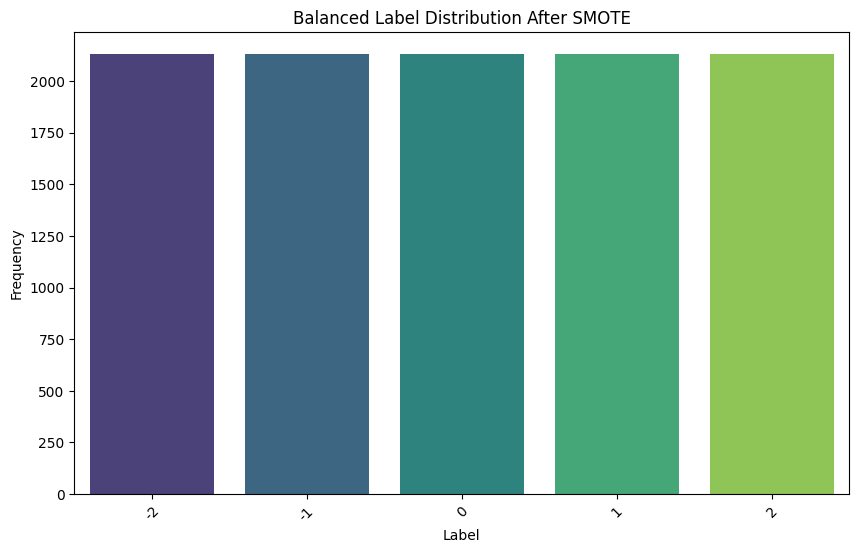

In [18]:
# Visualizing the new balanced class distribution after SMOTE
y_res_counts = pd.Series(y_res).value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=y_res_counts.index, y=y_res_counts.values, palette='viridis')
plt.title('Balanced Label Distribution After SMOTE')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Defining the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# parameter grid for RandomizedSearchCV
rf_params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Perform RandomizedSearchCV with 20 iterations and 3-fold cross-validation on the resampled data
rf_search = RandomizedSearchCV(rf_model, rf_params, n_iter=5, cv=3, n_jobs=-1, random_state=42)
rf_search.fit(X_res_scaled, y_res)

# Print the best parameters found by RandomizedSearchCV
print("Best Random Forest Parameters:", rf_search.best_params_)

# Train the final model with the best parameters
rf_best = RandomForestClassifier(**rf_search.best_params_, random_state=42)
rf_best.fit(X_res_scaled, y_res)

# Predict on the test set
rf_preds = rf_best.predict(X_test_scaled)

# Print accuracy and classification report
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))


Best Random Forest Parameters: {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 149}
Random Forest Accuracy: 0.5696902654867256
              precision    recall  f1-score   support

          -2       0.17      0.07      0.10        94
          -1       0.00      0.00      0.00        85
           0       0.62      0.93      0.74       537
           1       0.29      0.02      0.04        83
           2       0.17      0.08      0.11       105

    accuracy                           0.57       904
   macro avg       0.25      0.22      0.20       904
weighted avg       0.43      0.57      0.47       904



In [26]:
# Shift the labels to be positive integers
y_res_adjusted = y_res + 2
y_test_adjusted = y_test + 2

# Create and fit the XGBoost model with RandomizedSearchCV
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb_params = {
    'n_estimators': randint(50, 121),  # Upper bound should be inclusive (randint is exclusive)
    'max_depth': randint(3, 9),  # Increase the upper bound slightly
    'learning_rate': uniform(0.05, 0.15),  # Ensure range doesn't go beyond 0.2
    'subsample': uniform(0.7, 0.2),  # (0.7 to 0.9) → `uniform(0.7, 0.2)`
    'colsample_bytree': uniform(0.7, 0.2)  # (0.7 to 0.9)
}

# Perform RandomizedSearchCV with 20 iterations and 3-fold cross-validation on the resampled data
xgb_search = RandomizedSearchCV(xgb_model, xgb_params, n_iter=3, cv=3, n_jobs=-1, verbose=3, random_state=42)
xgb_search.fit(X_res_scaled, y_res_adjusted)

# Print the best parameters found by RandomizedSearchCV
print("Best XGBoost Parameters:", xgb_search.best_params_)

# Train the final model with the best parameters
xgb_best = XGBClassifier(**xgb_search.best_params_, random_state=42, use_label_encoder=False, tree_method="hist", eval_metric='logloss')
xgb_best.fit(X_res_scaled, y_res_adjusted)

# Make predictions with the adjusted test labels
xgb_preds = xgb_best.predict(X_test_scaled)

# Evaluate the model with the adjusted labels
print("XGBoost Accuracy:", accuracy_score(y_test_adjusted, xgb_preds))
print(classification_report(y_test_adjusted, xgb_preds))

# (Optional) Revert the adjusted labels back to original values for interpretation
xgb_preds_original = xgb_preds - 2
print("XGBoost Classification Report (Original Labels):")
print(classification_report(y_test, xgb_preds_original))

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [07:56:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=1.0370861069626263, learning_rate=0.24014286128198326, max_depth=5, n_estimators=110, subsample=1.2371651421518384;, score=nan total time=   6.5s
[CV 2/3] END colsample_bytree=1.101249477568232, learning_rate=0.06999498316360059, max_depth=5, n_estimators=73, subsample=1.2857996256539677;, score=nan total time=   6.4s
[CV 3/3] END colsample_bytree=0.7507704211243902, learning_rate=0.19439975445336494, max_depth=4, n_estimators=113, subsample=1.5929904033620956;, score=nan total time=   4.2s
[CV 1/3] END colsample_bytree=0.7891665505707182, learning_rate=0.06499623737270044, max_depth=5, n_estimators=73, subsample=0.8301776945897705;, score=0.891 total time= 3.9min


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:00:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=1.0370861069626263, learning_rate=0.24014286128198326, max_depth=5, n_estimators=110, subsample=1.2371651421518384;, score=nan total time=   6.5s
[CV 2/3] END colsample_bytree=0.7507704211243902, learning_rate=0.19439975445336494, max_depth=4, n_estimators=113, subsample=1.5929904033620956;, score=nan total time=   6.4s
[CV 2/3] END colsample_bytree=0.7749080237694724, learning_rate=0.19260714596148742, max_depth=5, n_estimators=110, subsample=0.8193700315892973;, score=0.912 total time= 5.3min
[CV 1/3] END colsample_bytree=1.101249477568232, learning_rate=0.06999498316360059, max_depth=5, n_estimators=73, subsample=1.2857996256539677;, score=nan total time=   6.5s
[CV 1/3] END colsample_bytree=0.7507704211243902, learning_rate=0.19439975445336494, max_depth=4, n_estimators=113, subsample=1.5929904033620956;, score=nan total time=   6.4s
[CV 1/3] END colsample_bytree=0.7749080237694724, learning_rate=0.19260714596148742, max_depth=5, n_estimators=110, subs

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:01:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:01:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:01:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:04:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/3] END colsample_bytree=0.7891665505707182, learning_rate=0.06499623737270044, max_depth=5, n_estimators=73, subsample=0.8301776945897705;, score=0.879 total time= 4.0min
[CV 2/3] END colsample_bytree=0.7891665505707182, learning_rate=0.06499623737270044, max_depth=5, n_estimators=73, subsample=0.8301776945897705;, score=0.877 total time= 4.0min
[CV 3/3] END colsample_bytree=0.71128231580542, learning_rate=0.15829981584002373, max_depth=8, n_estimators=87, subsample=0.7001557531682028;, score=0.915 total time= 7.2min


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:11:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/3] END colsample_bytree=0.71128231580542, learning_rate=0.15829981584002373, max_depth=8, n_estimators=87, subsample=0.7001557531682028;, score=0.919 total time= 7.9min
[CV 1/3] END colsample_bytree=0.71128231580542, learning_rate=0.15829981584002373, max_depth=8, n_estimators=87, subsample=0.7001557531682028;, score=0.915 total time= 8.1min
Best XGBoost Parameters: {'colsample_bytree': 0.71128231580542, 'learning_rate': 0.15829981584002373, 'max_depth': 8, 'n_estimators': 87, 'subsample': 0.7001557531682028}


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [08:15:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.577433628318584
              precision    recall  f1-score   support

           0       0.09      0.02      0.03        94
           1       0.00      0.00      0.00        85
           2       0.61      0.96      0.74       537
           3       0.29      0.02      0.04        83
           4       0.19      0.03      0.05       105

    accuracy                           0.58       904
   macro avg       0.23      0.21      0.17       904
weighted avg       0.42      0.58      0.45       904

XGBoost Classification Report (Original Labels):
              precision    recall  f1-score   support

          -2       0.09      0.02      0.03        94
          -1       0.00      0.00      0.00        85
           0       0.61      0.96      0.74       537
           1       0.29      0.02      0.04        83
           2       0.19      0.03      0.05       105

    accuracy                           0.58       904
   macro avg       0.23      0.21      0.17   

In [22]:
# Create and fit the Logistic Regression model with RandomizedSearchCV
lr_model = LogisticRegression(max_iter=50, random_state=42,class_weight='balanced')

lr_params = {
    'C': uniform(0.1, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform RandomizedSearchCV with verbose output
lr_search = RandomizedSearchCV(lr_model, lr_params, n_iter=3, cv=2, n_jobs=-1, random_state=42, verbose=5)
lr_search.fit(X_res_scaled, y_res)

# Print the best parameters found by RandomizedSearchCV
print("Best Logistic Regression Parameters:", lr_search.best_params_)

# Train final model with best parameters
lr_best = LogisticRegression(**lr_search.best_params_, max_iter=50, random_state=42, class_weight='balanced')
lr_best.fit(X_res_scaled, y_res)

# Make predictions on the test set
lr_preds = lr_best.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))


Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 2/2] END C=3.845401188473625, penalty=l1, solver=liblinear;, score=0.817 total time= 1.3min
[CV 1/2] END C=1.6601864044243653, penalty=l1, solver=liblinear;, score=0.820 total time=  59.6s
[CV 2/2] END C=7.41993941811405, penalty=l1, solver=liblinear;, score=0.817 total time= 1.7min
[CV 2/2] END C=1.6601864044243653, penalty=l1, solver=liblinear;, score=0.817 total time=  46.6s


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/2] END C=3.845401188473625, penalty=l1, solver=liblinear;, score=0.818 total time=29.9min


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/2] END C=7.41993941811405, penalty=l1, solver=liblinear;, score=0.822 total time=51.9min
Best Logistic Regression Parameters: {'C': 7.41993941811405, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.377212389380531
              precision    recall  f1-score   support

          -2       0.11      0.16      0.13        94
          -1       0.06      0.06      0.06        85
           0       0.60      0.55      0.57       537
           1       0.10      0.11      0.11        83
           2       0.17      0.18      0.17       105

    accuracy                           0.38       904
   macro avg       0.21      0.21      0.21       904
weighted avg       0.41      0.38      0.39       904



In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Shift labels to be positive integers
y_train_adjusted = y_train + 2
y_test_adjusted = y_test + 2

# Define **simplified** parameter distributions
lgbm_params = {
    'n_estimators': randint(50, 120),   # Lowered range
    'learning_rate': uniform(0.05, 0.1),
    'max_depth': randint(3, 7),
}

catboost_params = {
    'iterations': randint(100, 200),   # Lowered range
    'learning_rate': uniform(0.03, 0.07),
    'depth': randint(4, 8),
}

xgb_params = {
    'n_estimators': randint(50, 120),  # Lowered range
    'learning_rate': uniform(0.05, 0.1),
    'max_depth': randint(3, 6),
}

# Initialize base models with adjusted parameters
lgbm = LGBMClassifier(class_weight='balanced', random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42, early_stopping_rounds=10)
xgb = XGBClassifier(scale_pos_weight=10, objective='multi:softmax', random_state=42, use_label_encoder=False, eval_metric='logloss')

# Perform **faster** RandomizedSearchCV (reduced `n_iter`)
lgbm_search = RandomizedSearchCV(lgbm, lgbm_params, n_iter=2, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
catboost_search = RandomizedSearchCV(catboost, catboost_params, n_iter=2, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)
xgb_search = RandomizedSearchCV(xgb, xgb_params, n_iter=2, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Fit models
lgbm_search.fit(X_train, y_train_adjusted)
catboost_search.fit(X_train, y_train_adjusted)
xgb_search.fit(X_train, y_train_adjusted)

# Get best models
best_lgbm = lgbm_search.best_estimator_
best_catboost = catboost_search.best_estimator_
best_xgb = xgb_search.best_estimator_

# Define **lighter** stacking ensemble
stacking_clf = StackingClassifier(
    estimators=[
        ('lgbm', best_lgbm),
        ('catboost', best_catboost),
        ('xgb', best_xgb)
    ],
    final_estimator=LogisticRegression(max_iter=50),  # Reduced iterations
    stack_method='predict_proba',
    passthrough=False  # Disabled passthrough to speed up training
)

# Train the stacked model
stacking_clf.fit(X_train, y_train_adjusted)

# Make predictions
y_pred_adjusted = stacking_clf.predict(X_test)

# Evaluate
print("Stacking Model Accuracy:", accuracy_score(y_test_adjusted, y_pred_adjusted))
print(classification_report(y_test_adjusted, y_pred_adjusted))

# Convert labels back
y_pred_original = y_pred_adjusted - 2
print("Stacking Classification Report (Original Labels):")
print(classification_report(y_test, y_pred_original))


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.566284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 779845
[LightGBM] [Info] Number of data points in the train set: 2889, number of used features: 3194
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:29:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:29:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 784034
[LightGBM] [Info] Number of data points in the train set: 3612, number of used features: 3209
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:36:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.085815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 780592
[LightGBM] [Info] Number of data points in the train set: 2889, number of used features: 3193
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:51:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:51:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:52:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [19:52:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.


Stacking Model Accuracy: 0.5940265486725663
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        94
           1       0.00      0.00      0.00        85
           2       0.59      1.00      0.75       537
           3       0.00      0.00      0.00        83
           4       0.00      0.00      0.00       105

    accuracy                           0.59       904
   macro avg       0.12      0.20      0.15       904
weighted avg       0.35      0.59      0.44       904

Stacking Classification Report (Original Labels):
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        94
          -1       0.00      0.00      0.00        85
           0       0.59      1.00      0.75       537
           1       0.00      0.00      0.00        83
           2       0.00      0.00      0.00       105

    accuracy                           0.59       904
   macro avg       0.12      0.20    

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

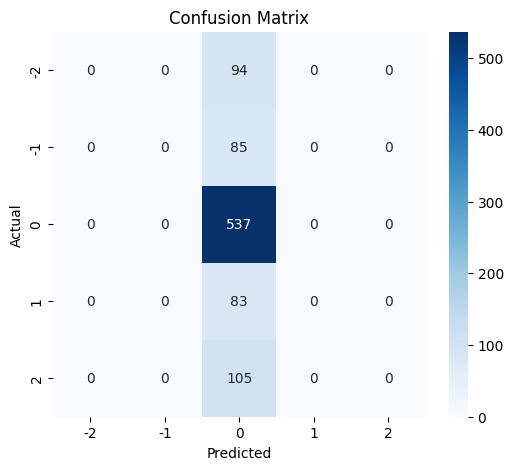

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
#Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_original)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

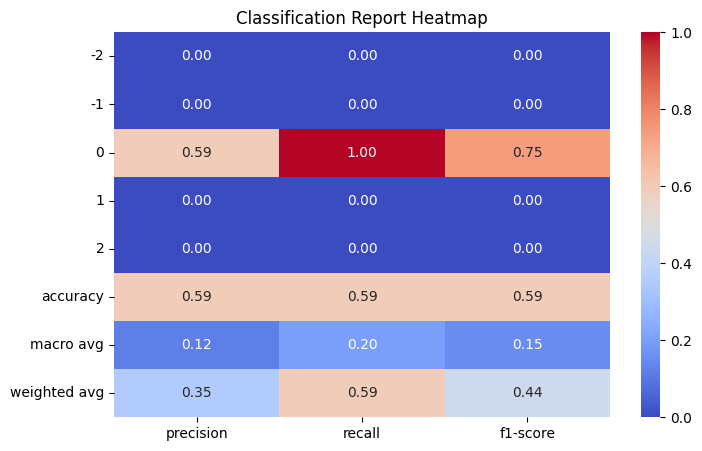

In [ ]:
# Classification Report as Heatmap
report = classification_report(y_test, y_pred_original, output_dict=True)
df_report = pd.DataFrame(report).iloc[:-1, :].T  # Exclude 'accuracy' row
plt.figure(figsize=(8, 5))
sns.heatmap(df_report, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

Feature Importances:


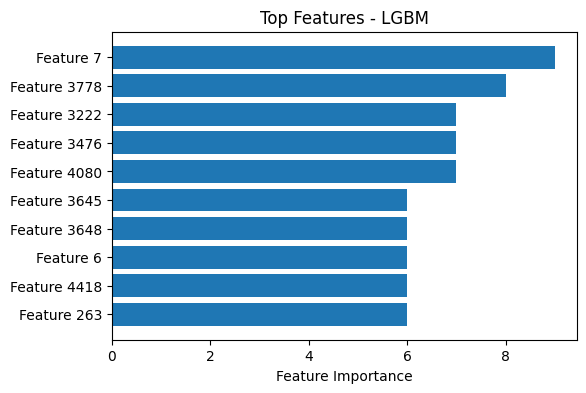

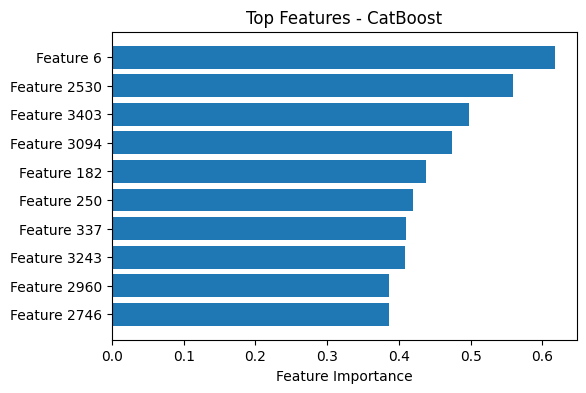

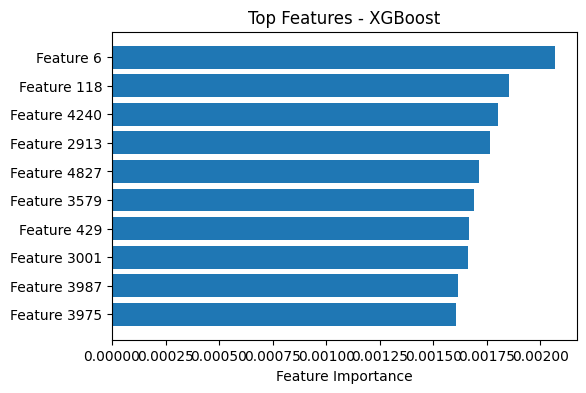

In [ ]:
#Feature Importance from Base Models
def plot_feature_importance(model, model_name, feature_names):
    """Plots feature importance for a given model."""
    
    # Handling CatBoost separately
    if isinstance(model, CatBoostClassifier):
        feature_importances = model.get_feature_importance()
    else:
        feature_importances = model.feature_importances_
    
    # Get sorted indices for top 10 features
    sorted_idx = np.argsort(feature_importances)[-10:]  # Show top 10 features

    plt.figure(figsize=(6, 4))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Top Features - {model_name}")
    plt.show()

# Ensure feature names are available
feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'Feature {i}' for i in range(X_train.shape[1])]

print("Feature Importances:")
plot_feature_importance(best_lgbm, "LGBM", feature_names)
plot_feature_importance(best_catboost, "CatBoost", feature_names)
plot_feature_importance(best_xgb, "XGBoost", feature_names)

<Figure size 1000x600 with 0 Axes>

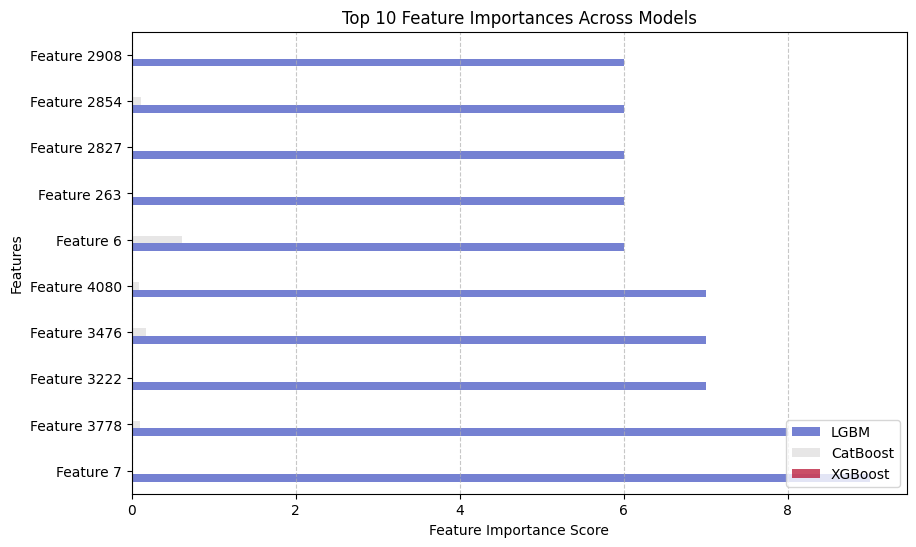

In [ ]:
#Comparing Feature Importance Across Models
plt.figure(figsize=(10, 6))

lgbm_importance = best_lgbm.feature_importances_
catboost_importance = best_catboost.get_feature_importance()
xgb_importance = best_xgb.feature_importances_

df_importance = pd.DataFrame({
    'Feature': feature_names,
    'LGBM': lgbm_importance,
    'CatBoost': catboost_importance,
    'XGBoost': xgb_importance
}).set_index('Feature')

df_importance.nlargest(10, 'LGBM').plot(kind='barh', figsize=(10, 6), colormap='coolwarm', alpha=0.7)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Feature Importances Across Models")
plt.legend(loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

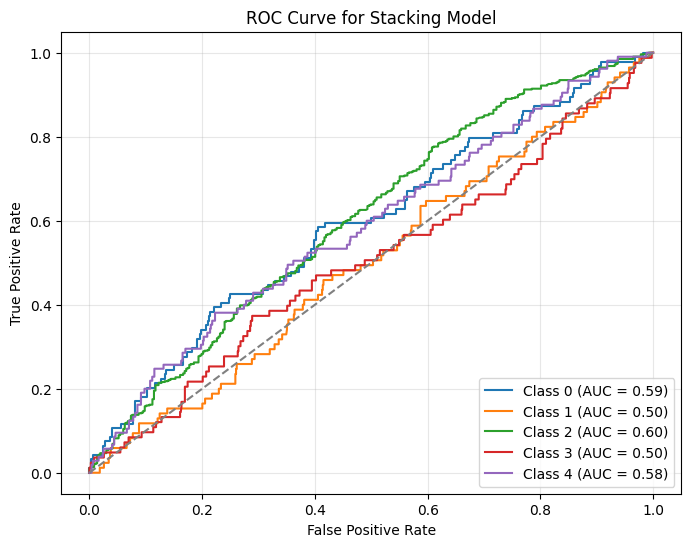

In [27]:
y_prob = stacking_clf.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(y_prob.shape[1]):  # Assuming multi-class classification
    fpr, tpr, _ = roc_curve(y_test_adjusted == i, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Stacking Model")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()